<a href="https://colab.research.google.com/github/brundakushi18-pixel/Cyclone_Prediction_Project/blob/main/Cyclone_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --quiet seaborn
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
sns.set(style="whitegrid", font_scale=1.05)
print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


In [2]:
from google.colab import files, drive
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print(f"✅ '{filename}' uploaded successfully!")

Saving cyclone_dataset.csv to cyclone_dataset.csv
✅ 'cyclone_dataset.csv' uploaded successfully!


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded[filename]))
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


✅ Dataset loaded successfully!
Shape: (400, 12)
Columns: ['Date', 'Year', 'Month', 'Sea_Surface_Temperature_C', 'Atmospheric_Pressure_hPa', 'Humidity_pct', 'Wind_Shear_ms', 'Vorticity_s^-1', 'Ocean_Depth_m', 'Proximity_to_Coast_km', 'Pre_Existing_Disturbance', 'Cyclone_Formation']


,Date,Year,Month,Sea_Surface_Temperature_C,Atmospheric_Pressure_hPa,Humidity_pct,Wind_Shear_ms,Vorticity_s^-1,Ocean_Depth_m,Proximity_to_Coast_km,Pre_Existing_Disturbance,Cyclone_Formation
0,1/15/2025,2025,1,29.03,1001.49,77.7,12.31,0.000051,2133.7,74.57,0,0
1,2/15/2025,2025,2,31.67,1001.39,73.4,8.77,0.000032,2059.5,77.07,0,1
2,3/15/2025,2025,3,29.54,1007.82,80.8,6.33,0.000077,1122.8,106.88,0,1
3,4/15/2025,2025,4,30.80,999.27,81.2,5.16,0.000068,3188.8,324.82,0,1
4,5/15/2025,2025,5,29.01,1007.79,91.2,6.27,0.000016,2135.7,300.76,1,1


In [4]:
df.columns = df.columns.str.strip()
df.fillna(df.mean(numeric_only=True), inplace=True)
if 'Latitude' in df.columns:
    df.rename(columns={'Latitude':'LAT'}, inplace=True)
print("Cleaned columns:", df.columns.tolist())
print("Missing values:\n", df.isna().sum().head(5))

Cleaned columns: ['Date', 'Year', 'Month', 'Sea_Surface_Temperature_C', 'Atmospheric_Pressure_hPa', 'Humidity_pct', 'Wind_Shear_ms', 'Vorticity_s^-1', 'Ocean_Depth_m', 'Proximity_to_Coast_km', 'Pre_Existing_Disturbance', 'Cyclone_Formation']
Missing values:
 Date                         0
Year                         0
Month                        0
Sea_Surface_Temperature_C    0
Atmospheric_Pressure_hPa     0
dtype: int64


In [5]:
if 'Cyclone_Formation' in df.columns:
    print("\nCyclone distribution (0=No, 1=Yes):")
    print(df['Cyclone_Formation'].value_counts())
    print("\nSummary statistics:\n", df.describe())


Cyclone distribution (0=No, 1=Yes):
Cyclone_Formation
1    279
0    121
Name: count, dtype: int64

Summary statistics:
               Year      Month  Sea_Surface_Temperature_C  \
count   400.000000  400.00000                 400.000000   
mean   2025.500000    6.46000                  29.263275   
std       0.500626    3.46387                   1.188846   
min    2025.000000    1.00000                  25.500000   
25%    2025.000000    3.00000                  28.470000   
50%    2025.500000    6.00000                  29.240000   
75%    2026.000000    9.00000                  30.082500   
max    2026.000000   12.00000                  32.650000   

       Atmospheric_Pressure_hPa  Humidity_pct  Wind_Shear_ms  Vorticity_s^-1  \
count                400.000000     400.00000     400.000000    4.000000e+02   
mean                1007.411050      83.25325       8.333075    5.887965e-05   
std                    5.517239       7.36606       4.376037    2.180283e-05   
min               

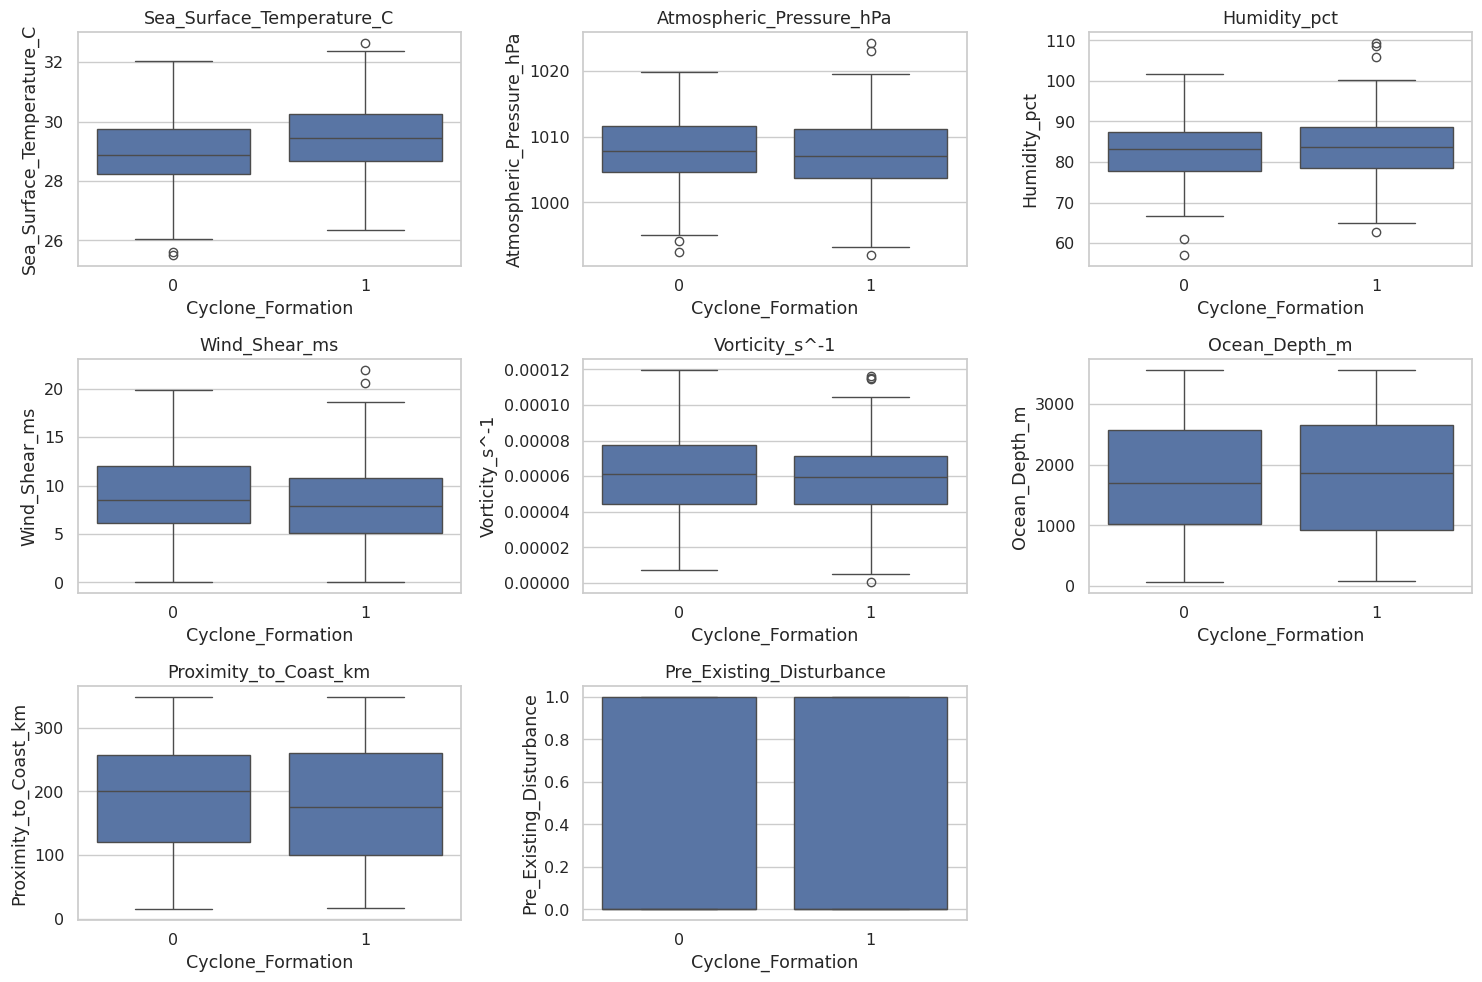

In [6]:
features = ['Sea_Surface_Temperature_C', 'Atmospheric_Pressure_hPa', 'Humidity_pct',
            'Wind_Shear_ms', 'Vorticity_s^-1', 'Ocean_Depth_m',
            'Proximity_to_Coast_km', 'Pre_Existing_Disturbance']
plt.figure(figsize=(15,10))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Cyclone_Formation', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

In [7]:
target = 'Pre_Existing_Disturbance'
X = df.drop(columns=[target])
y = df[target]
X = pd.get_dummies(X, drop_first=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print("✅ Data split complete.")

✅ Data split complete.


In [8]:
model = RandomForestClassifier(
n_estimators=400, max_depth=16,
min_samples_split=3, min_samples_leaf=1,
max_features='sqrt', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]
print("\n🔹 Predicted Cyclone Outcomes (0=No,1=Yes):", y_pred[:15])
print("🔹 Predicted Probabilities:", np.round(y_prob[:10],2))
acc = accuracy_score(y_test, y_pred)
print(f"\n📊 Model Accuracy: {acc*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test,y_pred, target_names=['No Pre-Existing', 'Pre-Existing']))


🔹 Predicted Cyclone Outcomes (0=No,1=Yes): [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
🔹 Predicted Probabilities: [0.28 0.36 0.34 0.28 0.31 0.46 0.18 0.23 0.34 0.26]

📊 Model Accuracy: 72.00%

Classification Report:
                  precision    recall  f1-score   support

No Pre-Existing       0.77      0.91      0.83        77
   Pre-Existing       0.22      0.09      0.12        23

       accuracy                           0.72       100
      macro avg       0.50      0.50      0.48       100
   weighted avg       0.64      0.72      0.67       100



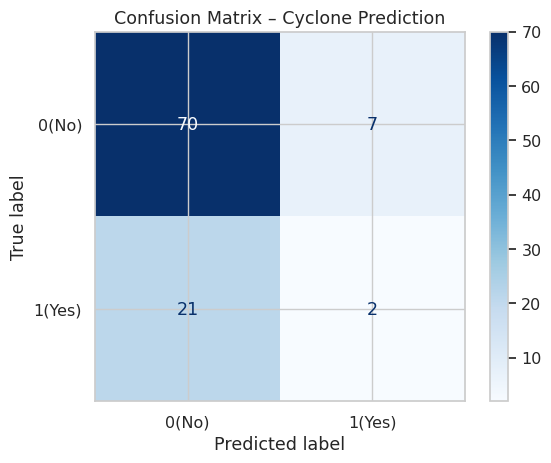

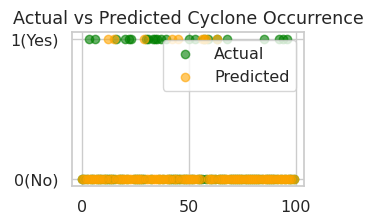

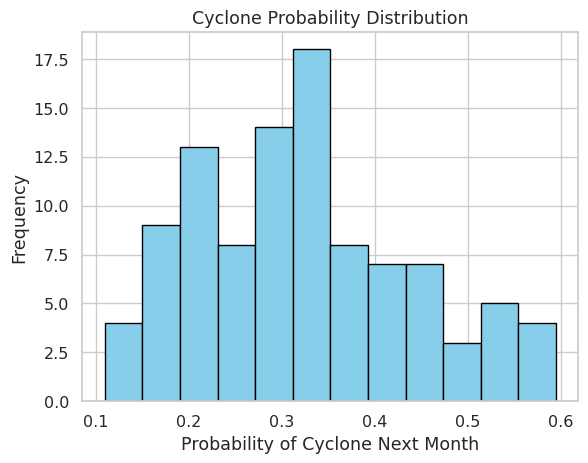

In [9]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['0(No)','1(Yes)']).plot(cmap='Blues')
plt.title("Confusion Matrix – Cyclone Prediction")
plt.show()
plt.figure(figsize=(3,2))
plt.scatter(range(len(y_test)), y_test, label='Actual', color='green', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', color='orange', alpha=0.6)
plt.yticks([0,1],['0(No)','1(Yes)'])
plt.legend(); plt.grid(True)
plt.title("Actual vs Predicted Cyclone Occurrence")
plt.show()
plt.hist(y_prob,bins=12,color='skyblue',edgecolor='black')
plt.title("Cyclone Probability Distribution")
plt.xlabel("Probability of Cyclone Next Month"); plt.ylabel("Frequency")
plt.grid(True); plt.show()

/tmp/ipython-input-2584938308.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',y='Feature',data=feat_imp,palette='viridis')


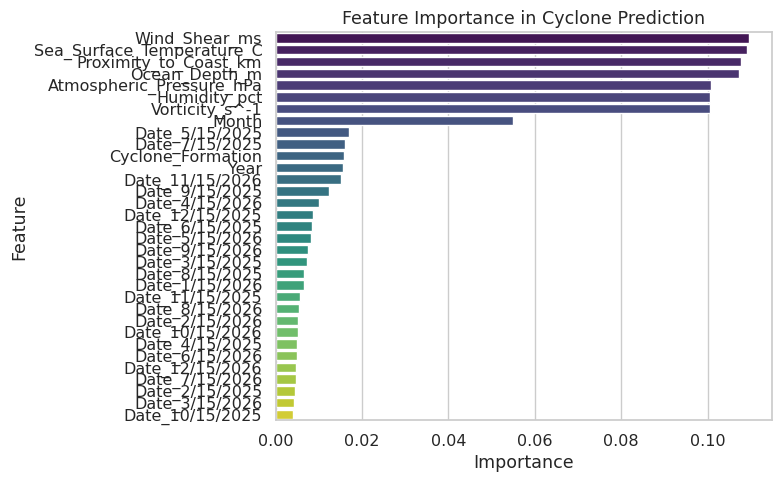

FeatureImportance Scores:

                      Feature  Importance
5               Wind_Shear_ms    0.109498
2   Sea_Surface_Temperature_C    0.109036
8       Proximity_to_Coast_km    0.107698
7               Ocean_Depth_m    0.107365
3    Atmospheric_Pressure_hPa    0.100715
4                Humidity_pct    0.100589
6              Vorticity_s^-1    0.100538
1                       Month    0.054863
23             Date_5/15/2025    0.016940
27             Date_7/15/2025    0.016031
9           Cyclone_Formation    0.015887
0                        Year    0.015555
14            Date_11/15/2026    0.015269
31             Date_9/15/2025    0.012320
22             Date_4/15/2026    0.010076
15            Date_12/15/2025    0.008660
25             Date_6/15/2025    0.008545
24             Date_5/15/2026    0.008123
32             Date_9/15/2026    0.007580
19             Date_3/15/2025    0.007392
29             Date_8/15/2025    0.006620
10             Date_1/15/2026    0.006509
13     

In [10]:
importance = model.feature_importances_
feat_imp = pd.DataFrame({'Feature':X.columns,'Importance':importance}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x='Importance',y='Feature',data=feat_imp,palette='viridis')
plt.title("Feature Importance in Cyclone Prediction")
plt.tight_layout();
plt.show()
print("FeatureImportance Scores:\n")
print(feat_imp)

In [11]:
# 🌊 Generate realistic synthetic dataset (Oct 2025–Dec 2026)
dates = pd.date_range("2025-10-01", "2026-12-31")
np.random.seed(42)
df = pd.DataFrame({
    'Date': dates.day, 'Month': dates.month, 'Year': dates.year,
    'SeaTemp': np.random.uniform(26, 32, len(dates)),
    'Pressure': np.random.uniform(980, 1015, len(dates)),
    'Humidity': np.random.uniform(60, 95, len(dates)),
    'WindShear': np.random.uniform(5, 25, len(dates)),
    'Vorticity': np.random.uniform(-1.5, 1.5, len(dates)),
    'OceanDepth': np.random.uniform(10, 100, len(dates)),
    'CoastProximity': np.random.uniform(0, 1, len(dates)),
    'Disturbances': np.random.randint(0, 2, len(dates))
})
df['Cyclone'] = ((df.SeaTemp>29)&(df.Pressure<995)&(df.Humidity>85)&(df.WindShear<15)).astype(int)

# 🌪 Train model
X, y = df.drop('Cyclone', axis=1), df['Cyclone']
X = pd.get_dummies(X, drop_first=True)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42).fit(Xtr, ytr)

# 📅 Predict for a given date
try:
    d, m, y = map(int, [input("Date: "), input("Month: "), input("Year: ")])
    sel = df[(df.Year==y)&(df.Month==m)&(df.Date==d)]
    if not sel.empty:
        print(f"\n🌪 Cyclone parameters for {d:02d}-{m:02d}-{y}:\n"); display(sel)
        s = pd.get_dummies(sel.drop('Cyclone', axis=1), drop_first=True).reindex(columns=X.columns, fill_value=0)
        pred, prob = model.predict(s), model.predict_proba(s)[:,1]
        print(f"\n🔹 Prediction (0=No,1=Yes): {pred.tolist()}")
        print(f"🔹 Probability of Cyclone: {np.round(prob*100,2)}%")
    else: print("⚠️ No data found for that date.")
except: print("⚠️ Enter valid numeric Date, Month, and Year.")

Date: 18
Month: 6
Year: 2026

🌪 Cyclone parameters for 18-06-2026:



,Date,Month,Year,SeaTemp,Pressure,Humidity,WindShear,Vorticity,OceanDepth,CoastProximity,Disturbances,Cyclone
260,18,6,2026,29.690043,1013.775942,82.1902,11.95143,0.966309,53.886503,0.250468,0,0



🔹 Prediction (0=No,1=Yes): [0]
🔹 Probability of Cyclone: [1.]%


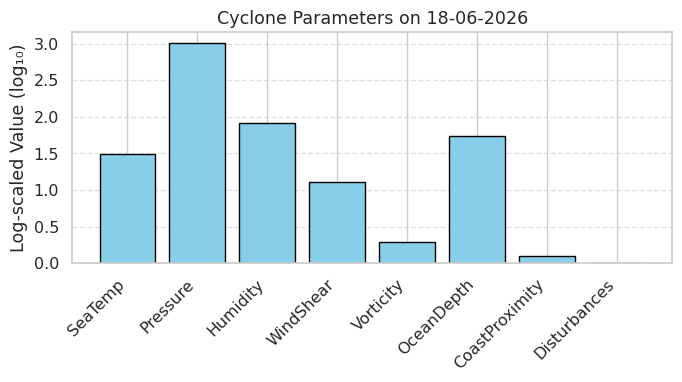

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 📊 Visualize parameters of the selected date
if not sel.empty:
    params = sel.drop(columns=['Year', 'Month', 'Date', 'Cyclone']).iloc[0]

    # 🔹 Apply log scaling to handle large value differences
    log_values = np.log10(params + 1)  # +1 to avoid log(0)

    plt.figure(figsize=(7, 4))
    plt.bar(params.index, log_values, color='skyblue', edgecolor='black')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Log-scaled Value (log₁₀)")
    plt.title(f"Cyclone Parameters on {d:02d}-{m:02d}-{y}")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()